In this notebook we show time dynamics of the number of users, the number of questions that waited at least a month for accepted answer and the average time to accept an answer for all questions posted on Stack Overflow. The data was obtained with SQL quaries on Stack Exchange Data Explorer.

Quary for the number of users versus year:

SELECT sub.Year, sub.NumNewUsers, SUM(sub.NumNewUsers) OVER(ORDER BY sub.Year) as CumNumUsers  
FROM  
  (SELECT   
    year(CreationDate) as Year, COUNT(Id) as NumNewUsers  
    FROM Users  
  GROUP BY year(CreationDate)  
  ) sub  


Quary for the average time to accept an answer:

SELECT year(q.CreationDate) as Year, AVG(DATEDIFF(hour, q.CreationDate, a.CreationDate)) as AvgNumHoursToAccept  
FROM Posts q   
JOIN Posts a ON q.AcceptedAnswerId = a.Id  
WHERE q.PostTypeId = 1  
GROUP BY year(q.CreationDate)  

Quary for the number of questions that did not receive answers for at least a month (or were not answered at all):

SELECT year(q.CreationDate) as QuestionYear,  
COUNT(q.Id) as NumQuestions  
FROM Posts q  
LEFT JOIN Posts a ON a.Id = q.AcceptedAnswerId  
WHERE q.PostTypeId = 1 AND (month(q.CreationDate) != month(a.CreationDate)  
OR q.AcceptedAnswerId IS NULL)  
GROUP BY year(q.CreationDate)  


In [16]:
import pandas as pd

users = pd.read_csv('./NumUsersVsTime.csv')
questions = pd.read_csv('./NumQuestionsNotAnsweredInMonth.csv')
averageAcceptTime = pd.read_csv('./AvgNumHoursToAccept.csv')

Text(0,0.5,'<# hours to accept answer>')

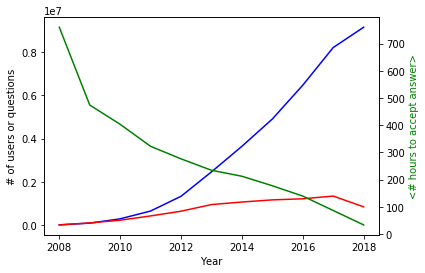

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(users['Year'].values, users['CumNumUsers'].values, 'b')
ax.plot(questions['QuestionYear'].values, questions['NumQuestions'].values, 'r')

ax2.plot(averageAcceptTime['Year'].values, averageAcceptTime['AvgNumHoursToAccept'].values, 'g')

ax2.yaxis.label.set_color('g')
ax.set_xlabel('Year')
ax.set_ylabel('# of users or questions')
ax2.set_ylabel('<# hours to accept answer>')

This graph shows that Stack Overflow is doing pretty well. While the number of users (blue) is growing, the number of questions that wait long for an accepted answer (red) increases, but not as fast. The average time to accept an answer also decreases. Overall it means that Stack Overflow is an efficient platform for sharing knowledge. 